<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

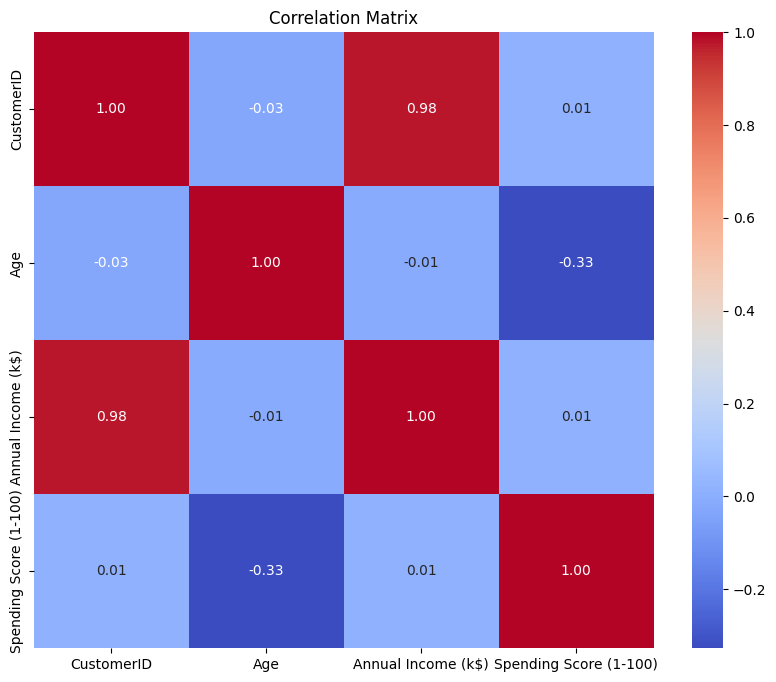

To find which is correlated more


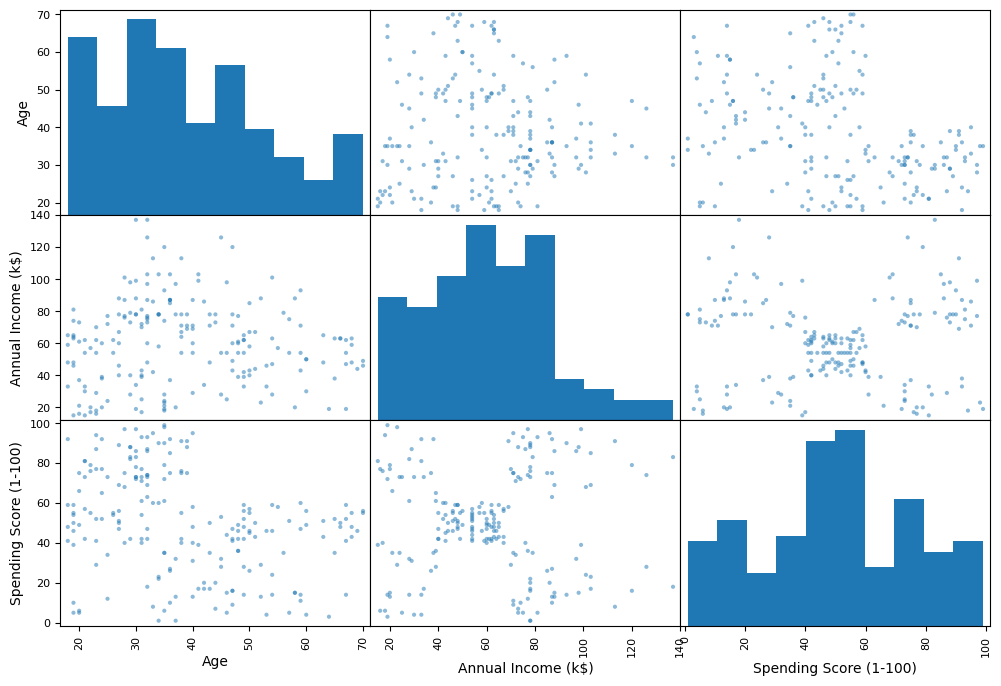

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pandas.plotting import scatter_matrix
import seaborn as sns

df = pd.read_csv("/content/Mall_Customers.csv")

print(df.info())
print(df.describe())

print("No missing attributes present")
print('\n Scaling numerical features \n')

#preprocessing
scaler = StandardScaler()
X = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

print(df.head())

#correlation
df_copy = df.select_dtypes(include=['float64', 'int64'])
print('plotting correlation matrix')
corr_matrix = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print('To find which is correlated more')
atttributes = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scatter_matrix(df[atttributes], figsize=(12, 8))
plt.show()

print('We dont find any good number of correlations from the correlation matrix hence the number of features remains the same as we proceed')

#train-test split
X_train, y_train, X_test,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

